In [57]:
# Import dependencies
import pandas as pd
import scipy.stats as st
from  matplotlib import pyplot as plt
import csv
import os

In [6]:
data_df = pd.read_csv("listings1.csv")
data_df = data_df.drop("neighbourhood_group", axis = 1)
data_df = data_df.dropna()
data_df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,Cuauhtémoc,19.44076,-99.16324,Private room,1969,1,57,2019-05-27,0.52,9,355
4,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,Cuauhtémoc,19.41006,-99.17645,Private room,1893,1,39,2019-05-02,0.42,10,334
5,58955,Entire beautiful duplex in la Roma,282620,Nat,Cuauhtémoc,19.42292,-99.15775,Entire home/apt,1625,3,39,2019-05-28,0.43,1,178
6,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,Cuauhtémoc,19.41259,-99.17959,Private room,956,2,51,2019-04-05,2.55,3,180
7,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtémoc,19.41375,-99.17028,Entire home/apt,1816,2,39,2019-02-24,0.42,3,361


In [7]:
# cal_df = pd.read_csv("calendar.csv")
# cal_df.head()
# list_df = pd.read_csv("listings.csv")
# list_df.head()

In [8]:
# Count places where the most airbnb are available
data_df["neighbourhood"].value_counts()

Cuauhtémoc                6092
Miguel Hidalgo            2281
Benito Juárez             2221
Coyoacán                  1176
Álvaro Obregón             589
Tlalpan                    504
Cuajimalpa de Morelos      284
Venustiano Carranza        261
Gustavo A. Madero          181
Iztacalco                  169
Azcapotzalco               132
Iztapalapa                 105
La Magdalena Contreras      87
Xochimilco                  52
Tláhuac                     15
Milpa Alta                   5
Name: neighbourhood, dtype: int64

In [9]:
# Count the airbnb minimum nights per neighbourhood
data_df.groupby(["neighbourhood"])["minimum_nights"].value_counts()

neighbourhood   minimum_nights
Azcapotzalco    1                 79
                2                 34
                3                  8
                7                  7
                4                  1
                                  ..
Álvaro Obregón  90                 2
                8                  1
                14                 1
                30                 1
                110                1
Name: minimum_nights, Length: 180, dtype: int64

In [10]:
# Calculate the room type per minimum nights and neighbourhood
data_df.groupby(["neighbourhood", "minimum_nights"])["room_type"].value_counts()

neighbourhood   minimum_nights  room_type      
Azcapotzalco    1               Private room       52
                                Entire home/apt    26
                                Shared room         1
                2               Private room       20
                                Entire home/apt    13
                                                   ..
Álvaro Obregón  15              Private room        1
                30              Entire home/apt     1
                90              Entire home/apt     1
                                Private room        1
                110             Entire home/apt     1
Name: room_type, Length: 310, dtype: int64

In [11]:
# Calculate the amount of pricing per nights, roomtype and neighbourhood
data_df.groupby(["neighbourhood", "room_type", "minimum_nights"])["price"].value_counts()

neighbourhood   room_type        minimum_nights  price
Azcapotzalco    Entire home/apt  1               593      3
                                                 707      3
                                                 554      2
                                                 650      2
                                                 726      2
                                                         ..
Álvaro Obregón  Private room     15              306      1
                                 90              210      1
                Shared room      1               287      1
                                                 401      1
                                                 497      1
Name: price, Length: 3946, dtype: int64

In [12]:
data_df.groupby(["price"])["reviews_per_month"].value_counts()

price   reviews_per_month
0       0.17                 1
        0.30                 1
        0.49                 1
        0.77                 1
        0.81                 1
                            ..
34411   1.76                 1
36705   0.32                 1
57351   0.03                 1
152936  0.80                 1
191170  0.16                 1
Name: reviews_per_month, Length: 10381, dtype: int64

In [46]:
data_df.head()
max_nights = max(data_df["minimum_nights"])
max_nights_neig = data_df.loc[data_df["minimum_nights"]==max_nights]
print(f"Max of the minimun nights is: {max_nights}")
display(max_nights_neig)

Max of the minimun nights is: 1000


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5738,18895134,Recamara en PH en col. Del Valle cerca de WTC,105333261,Luis Fernando,Benito Juárez,19.39053,-99.16790,Private room,210,1000,5,2017-09-08,0.20,1,90
6431,19999002,Depa Pitágoras,67214457,Iris,Benito Juárez,19.37505,-99.14404,Private room,191,1000,1,2017-09-30,0.05,2,179


In [22]:
data_df.groupby(["neighbourhood","price"])["reviews_per_month"].count()

neighbourhood   price
Azcapotzalco    191      12
                210       8
                249       8
                268       2
                287       4
                         ..
Álvaro Obregón  5009      2
                5334      1
                5926      1
                6270      1
                11279     1
Name: reviews_per_month, Length: 1290, dtype: int64

## Reviews 

1: Neighbourhood 2: Room type 3: Minimum nights

In [31]:
reviews_neig= pd.DataFrame(data_df.groupby(["neighbourhood"])["reviews_per_month"].count())
reviews_neig.sort_values(["reviews_per_month"], ascending = False)

,reviews_per_month
neighbourhood,
Cuauhtémoc,6092
Miguel Hidalgo,2281
Benito Juárez,2221
Coyoacán,1176
Álvaro Obregón,589
Tlalpan,504
Cuajimalpa de Morelos,284
Venustiano Carranza,261
Gustavo A. Madero,181


In [62]:
reviews_df=pd.DataFrame(data_df.groupby(["neighbourhood","room_type", "minimum_nights"])
                        ["reviews_per_month"].count())
reviews_df.sort_values(["minimum_nights"])

reviews_per_month
neighbourhood  room_type       minimum_nights                   
Azcapotzalco   Entire home/apt 1                              26
Iztapalapa     Private room    1                              54
               Entire home/apt 1                              14
Iztacalco      Shared room     1                               6
               Private room    1                              67
...                                                          ...
Miguel Hidalgo Entire home/apt 184                             1
                               200                             1
Benito Juárez  Entire home/apt 300                             1
                               365                             1
               Private room    1000                            2

[310 rows x 1 columns]

In [72]:

print(min(data_df["availability_365"]))
ava = pd.DataFrame(data_df.groupby(["availability_365","minimum_nights"])["reviews_per_month"].count())
ava

0


reviews_per_month
availability_365 minimum_nights                   
0                1                             560
                 2                             421
                 3                             182
                 4                              39
                 5                              34
...                                            ...
365              8                               2
                 10                              1
                 15                              3
                 30                             10
                 91                              1

[1677 rows x 1 columns]

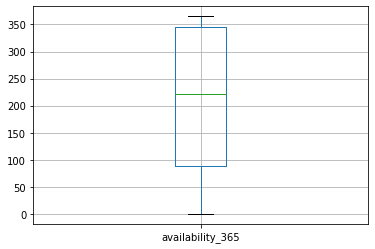

In [77]:
data_df.boxplot(column=["availability_365"])
plt.show()

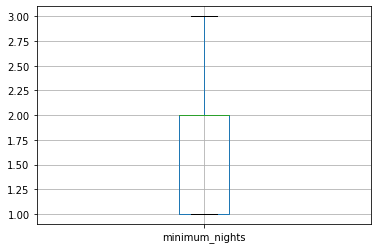

In [64]:
data_df.boxplot(column=["minimum_nights"],showfliers=False)
plt.show()

## Observations

1) There are Airbnbs that have availibility cero.
2) There are Airbnbs that have a minimun night per month that equals 1000

This two poitns can affect the data.

There are 2 Aribnbs that have a minimum night of 1000, but they are just available  90 or 179 days per year.